In [366]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['font.size'] = 14
import pylab_util as PU
import os
import control

In [408]:
fn_beam = 'test_05_MPU_6050.csv'
#fn_direct = 'test_06_direct_to_hub_MPU_6050.csv'
fn_direct = 'test_01_direct_to_hub_MPU_6050_0_97.csv'

case = 2

if case == 1:
    fn = fn_beam
elif case == 2:
    fn = fn_direct
    
data = np.loadtxt(fn, delimiter=',')
n = data[:,0]
t_ms = data[:,1]
t = t_ms/1000.0
dt_vect = t[1:] - t[0:-1]
dtm = dt_vect.mean()
thd = data[:,2]
enc = data[:,3]
amp = data[:,4]
compY = data[:,5]
ax = data[:,6]
ay = data[:,7]
az = data[:,8]
gx = data[:,9]
gy = data[:,10]
gz = data[:,11]

In [409]:
def plot_list(vlist, sep=False):
    if not sep:
        plt.figure()
    for vect in vlist:
        if sep:
            plt.figure()
        plt.plot(t_ms,vect)

In [410]:
def num_int(vect):
    N = len(vect)
    int_out = np.zeros(N)
    
    for i in range(1,N):
        trapz_i = (vect[i]+vect[i-1])*0.5*dtm
        int_out[i] = int_out[i-1] + trapz_i
        
    return int_out

In [411]:
thetay = num_int(gy)

246.80000000000001

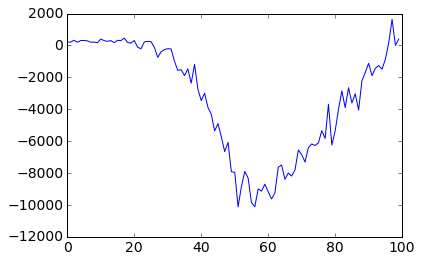

In [418]:
plt.figure()
plt.plot(ax[0:100])
ax[0:10].mean()

In [413]:
gy[0:10].mean()

-154.30000000000001

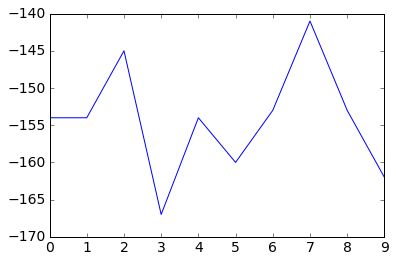

In [414]:
plt.figure()
plt.plot(gy[0:10])

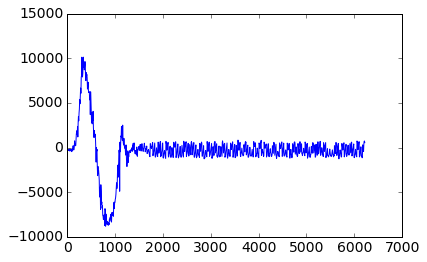

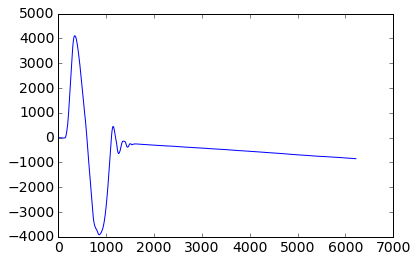

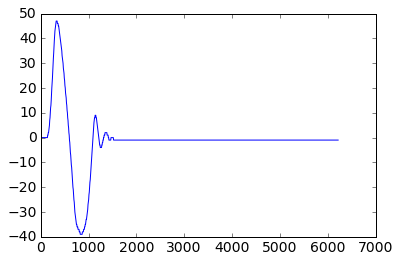

In [415]:
plot_list([-ax,thetay,enc],sep=1)

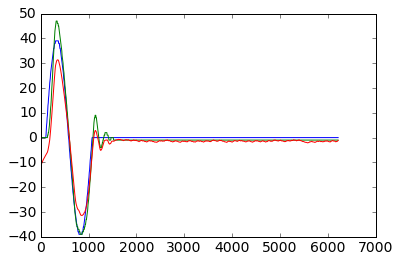

In [416]:
plot_list([thd,enc,compY])

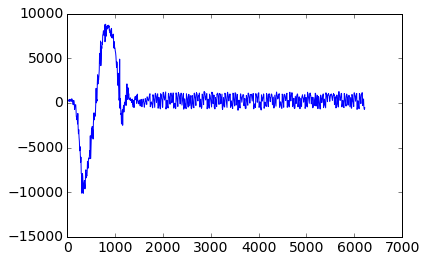

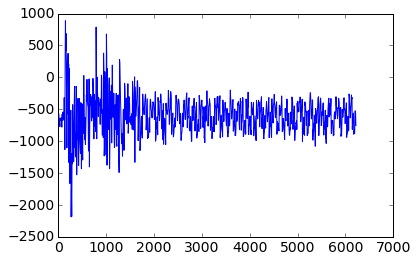

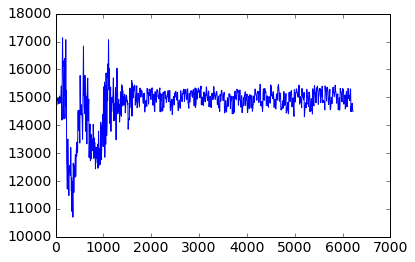

In [417]:
plot_list([ax,ay,az],sep=1)

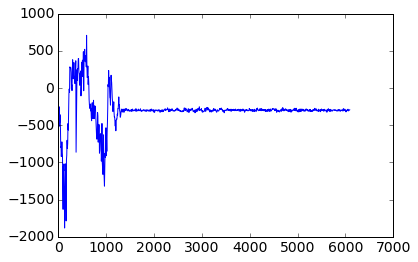

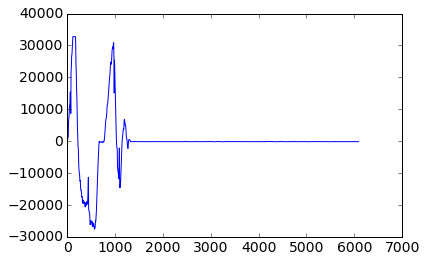

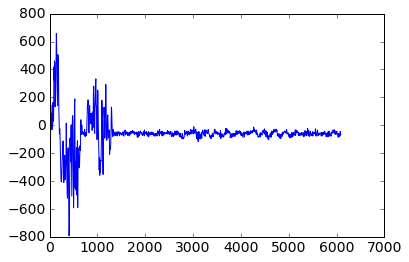

In [400]:
plot_list([gx,gy,gz],sep=1)

In [255]:
pitch = np.arctan2(ax,az)*180/np.pi

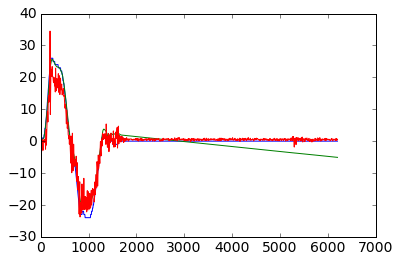

In [257]:
plot_list([enc,thetay/100,-pitch])

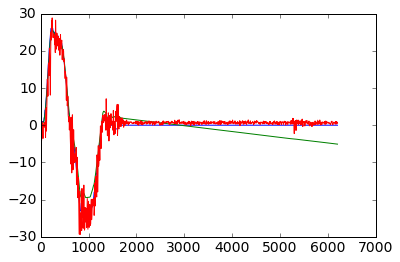

In [258]:
plot_list([enc,thetay/100,-ax/6000*30])

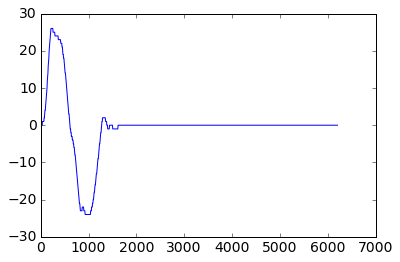

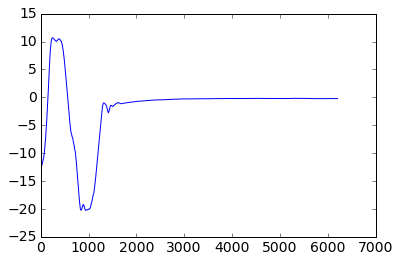

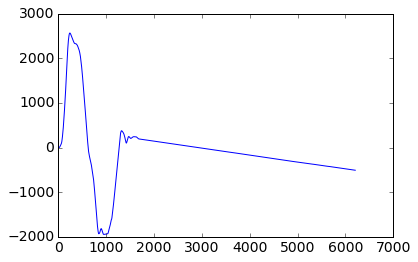

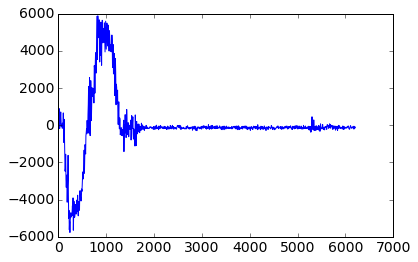

In [259]:
plot_list([enc,compY,thetay,ax],sep=1)

In [260]:
N = len(gy)

mycompfilt = np.zeros(N)
degconvert = 57.2957786

a = 0.01

for i in range(1,N):
    gyroYrate = gy[i]/131.0
    pitch = np.arctan2(-ax[i], az[i])*degconvert
    mycompfilt[i] = (1-a) * (mycompfilt[i-1] + gyroYrate * dtm) + a * pitch 

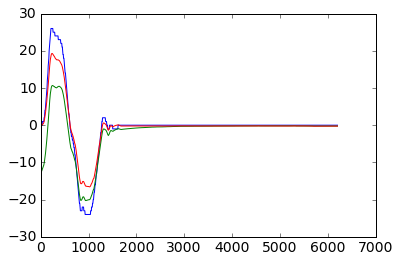

In [261]:
plot_list([enc,compY,mycompfilt],sep=0)

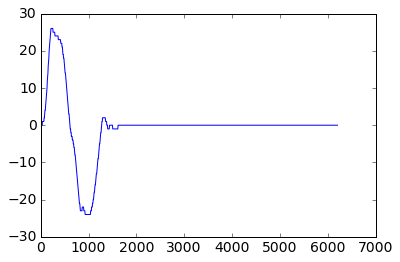

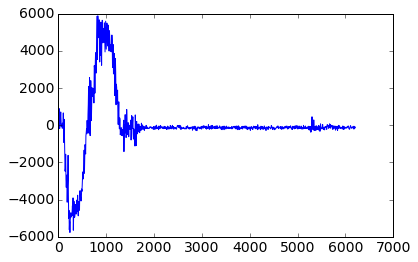

In [262]:
plot_list([enc,ax],sep=1)

In [316]:
wn = 3*2*np.pi

In [317]:
lp = control.TransferFunction(wn,[1,wn])
lp


  18.85
---------
s + 18.85

In [318]:
lp_z = control.matlab.c2d(lp,dtm,method='tustin')
lp_z


0.05536 z + 0.05536
-------------------
    z - 0.8893

dt = 0.00621778557114

In [319]:
b_lp = np.squeeze(lp_z.num)
b_lp

array([ 0.05535724,  0.05535724])

In [320]:
a_lp = np.squeeze(lp_z.den)
a_lp

array([ 1.        , -0.88928551])

In [321]:
from scipy import signal

In [322]:
ax_filt = signal.lfilter(b_lp, a_lp, ax)

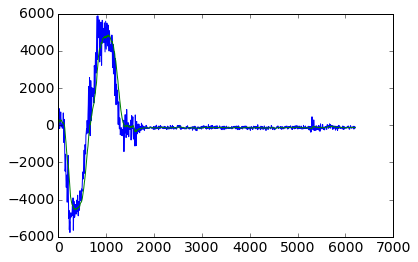

In [323]:
plot_list([ax,ax_filt])

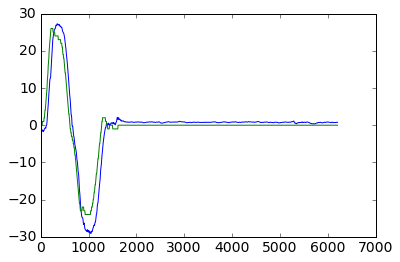

In [324]:
plot_list([-ax_filt/5000*30,enc])

In [329]:
wnf = 0.3*2*np.pi
hp = control.TransferFunction([1,0],[1,wnf])
hp


    s
---------
s + 1.885

In [330]:
hp_z = control.matlab.c2d(hp,dtm,method='tustin')
hp_z


0.9942 z - 0.9942
-----------------
    z - 0.9883

dt = 0.00621778557114

In [331]:
b_hp = np.squeeze(hp_z.num)
b_hp

array([ 0.99417402, -0.99417402])

In [332]:
a_hp = np.squeeze(hp_z.den)
a_hp

array([ 1.        , -0.98834803])

In [333]:
theta_y_filt = signal.lfilter(b_hp, a_hp, thetay)

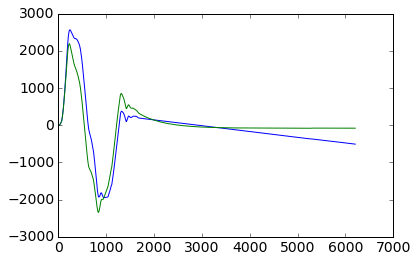

In [334]:
plot_list([thetay,theta_y_filt])

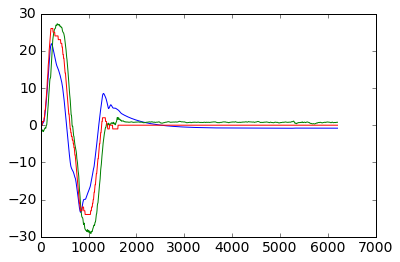

In [335]:
plot_list([theta_y_filt/100,-ax_filt/5000*30, enc])

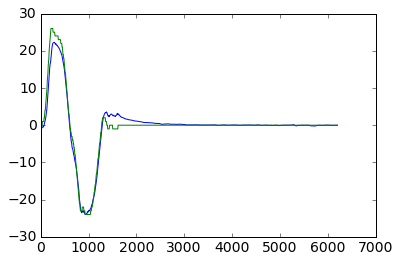

In [336]:
a = 0.5
hack_filt = a*(theta_y_filt/100) + (1-a)*(-ax_filt/5000*30)
plot_list([hack_filt, enc])